In [1]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_diabetes
import graphviz

In [3]:
# Diabetes（糖尿病） データセットの読み込み
diabetes_data = load_diabetes()

In [17]:
print(diabetes_data.data.shape)
diabetes_data.data[:5]

(442, 10)


array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [18]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [20]:
# pandas データフレームへの変換
# 特徴量を変換
diabetes_data_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
# 目的変数を追加
diabetes_data_df['target'] = diabetes_data.target

In [21]:
diabetes_data_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [31]:
diabetes_data_df.columns, len(diabetes_data_df.columns)

(Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
        'target'],
       dtype='object'), 11)

In [38]:
# 回帰木でモデルの訓練
clf = tree.DecisionTreeRegressor(max_depth=2)
clf = clf.fit(diabetes_data_df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']], diabetes_data_df['target'])

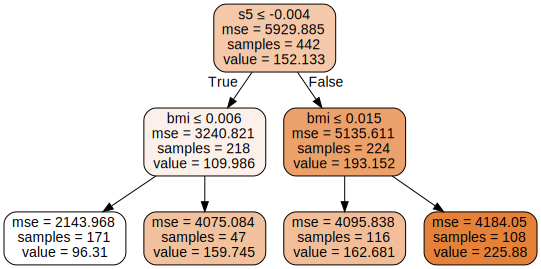

In [41]:
# 訓練モデルをツリー表示
dot_data2 = tree.export_graphviz(clf, out_file=None,
                                feature_names=diabetes_data_df.columns[0:10],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph2 = graphviz.Source(dot_data2)
graph2

In [58]:
clf3 = tree.DecisionTreeRegressor(max_depth=2)
# 特徴量：'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'
# clf3 = clf3.fit(diabetes_data_df.iloc[:, 0:10], diabetes_data_df['target'])
feature_number = len(diabetes_data_df.columns) - 1
clf3 = clf3.fit(diabetes_data_df.iloc[:, :feature_number], diabetes_data_df.iloc[:, -1])

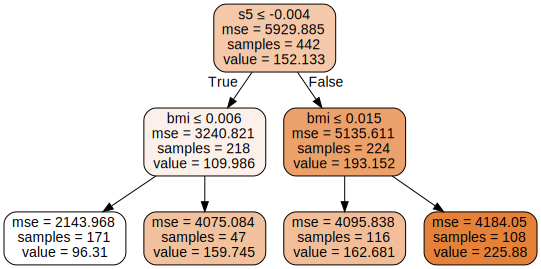

In [59]:
dot_data3 = tree.export_graphviz(clf3, out_file=None,
                                feature_names=diabetes_data_df.columns[0:feature_number],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph3 = graphviz.Source(dot_data3)
graph3